In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.model_selection import KFold,StratifiedKFold
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoLars
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn import svm
from sklearn.linear_model import LassoCV, HuberRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectPercentile
from sklearn import linear_model
from sklearn.ensemble import VotingRegressor, StackingRegressor,BaggingRegressor
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import VotingClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.gaussian_process.kernels import RBF

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.


https://www.kaggle.com/datasets/larsen0966/student-performance-data-set?resource=download

In [4]:
df=pd.read_csv("/content/student-por.csv")

df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [5]:
df.shape

(649, 33)

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
df.isnull().sum()
df.duplicated().value_counts()

,count
False,649


EDA

 Важное примечание: целевой атрибут G3 имеет сильную корреляцию с атрибутами G2 и G1. Это происходит потому что G3 - это итоговая оценка за год (выставляется на 3-м уроке), в то время как G1 и G2 соответствуют 1-му и 2-му классам за период. Сложнее предсказать G3 без G2 и G1, но такой прогноз гораздо полезнее.

--------------- 
Pearson's Correlation


<Axes: >

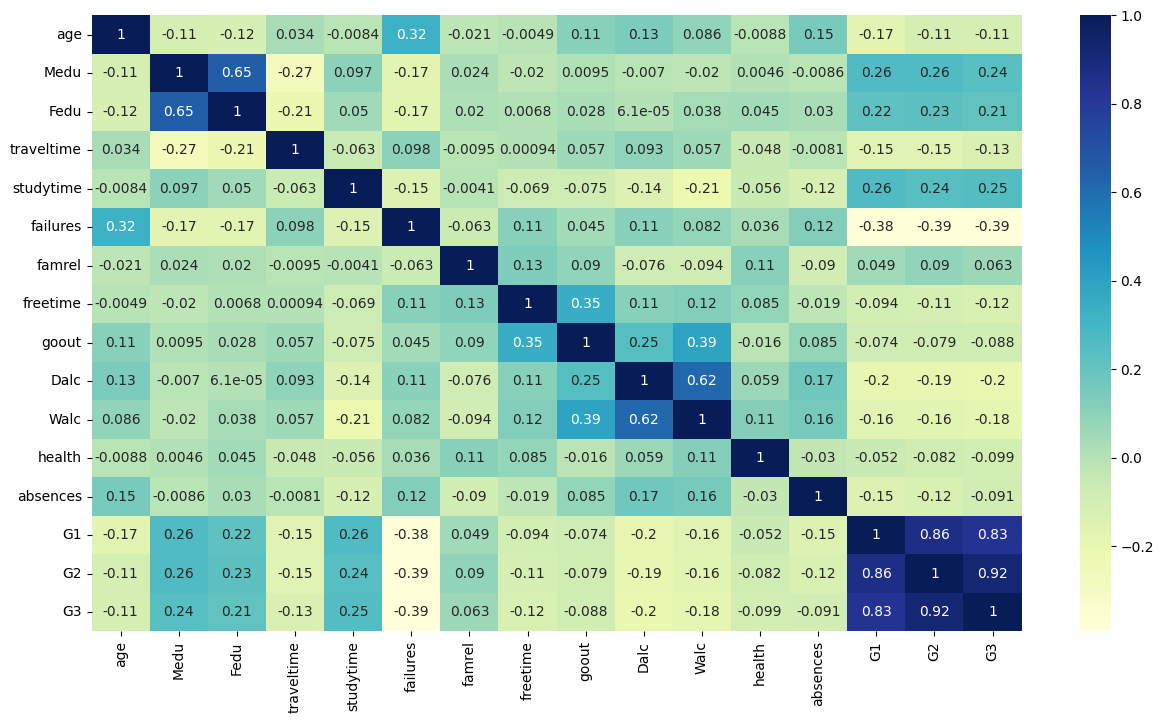

In [8]:
print('-'*15,'\nPearson\'s Correlation')
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, cmap="YlGnBu")

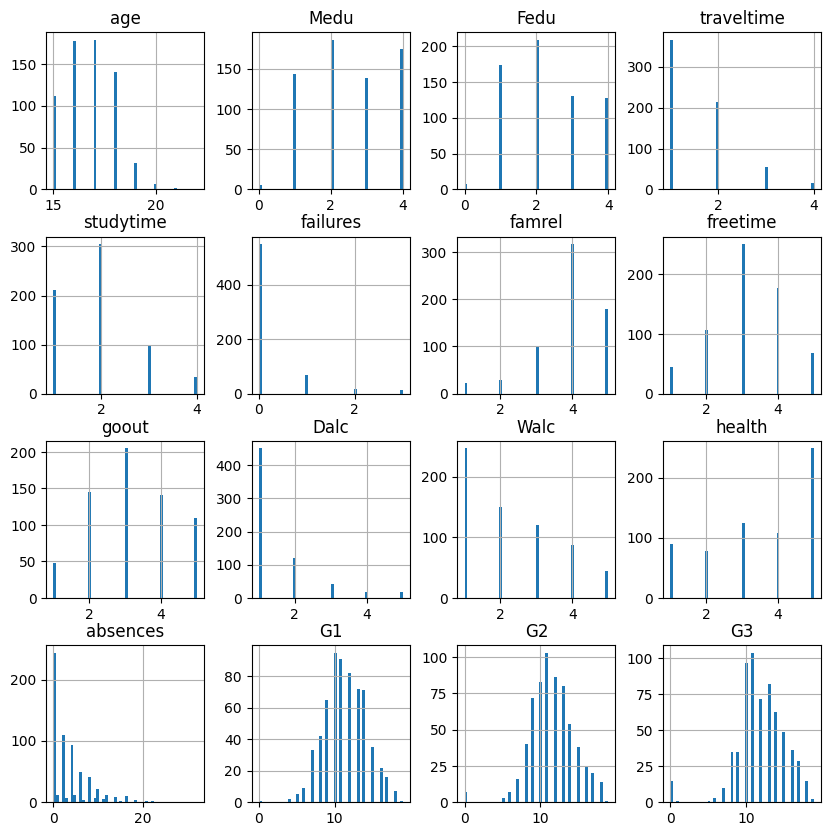

In [9]:
cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2','G3']
df[cols].hist(bins = 50, figsize = (10, 10))
plt.show()

   failures sex  count
0         0   F    329
1         0   M    220
2         1   F     42
3         1   M     28
4         2   F      7
5         2   M      9
6         3   F      5
7         3   M      9


Text(0.5, 1.0, 'Count of Failures by Sex')

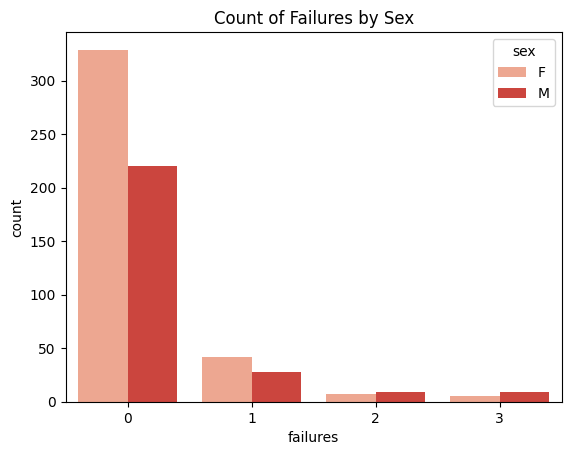

In [10]:
failure_counts = df.groupby(["failures", "sex"]).size().reset_index(name="count")
print(failure_counts)
sns.countplot(data=df, x="failures", hue="sex", palette="Reds")

plt.title('Count of Failures by Sex')

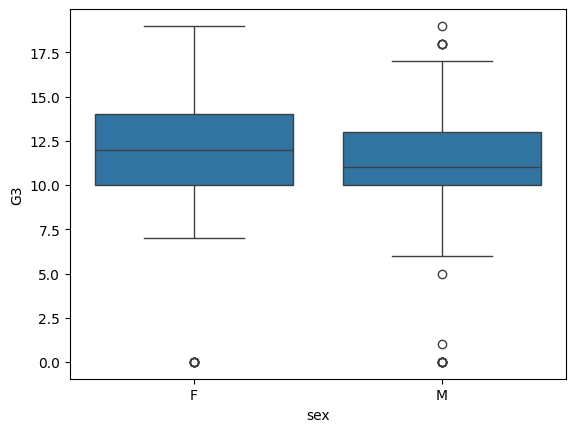

In [11]:
sns.boxplot(x="sex", y="G3", data=df)
school_counts=df["sex"].value_counts()
stu=df.drop(["sex"],axis=1)

In [12]:
cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
num_columns = ['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']
cont_columns = ['age','failures','absences','G1','G2','G3']

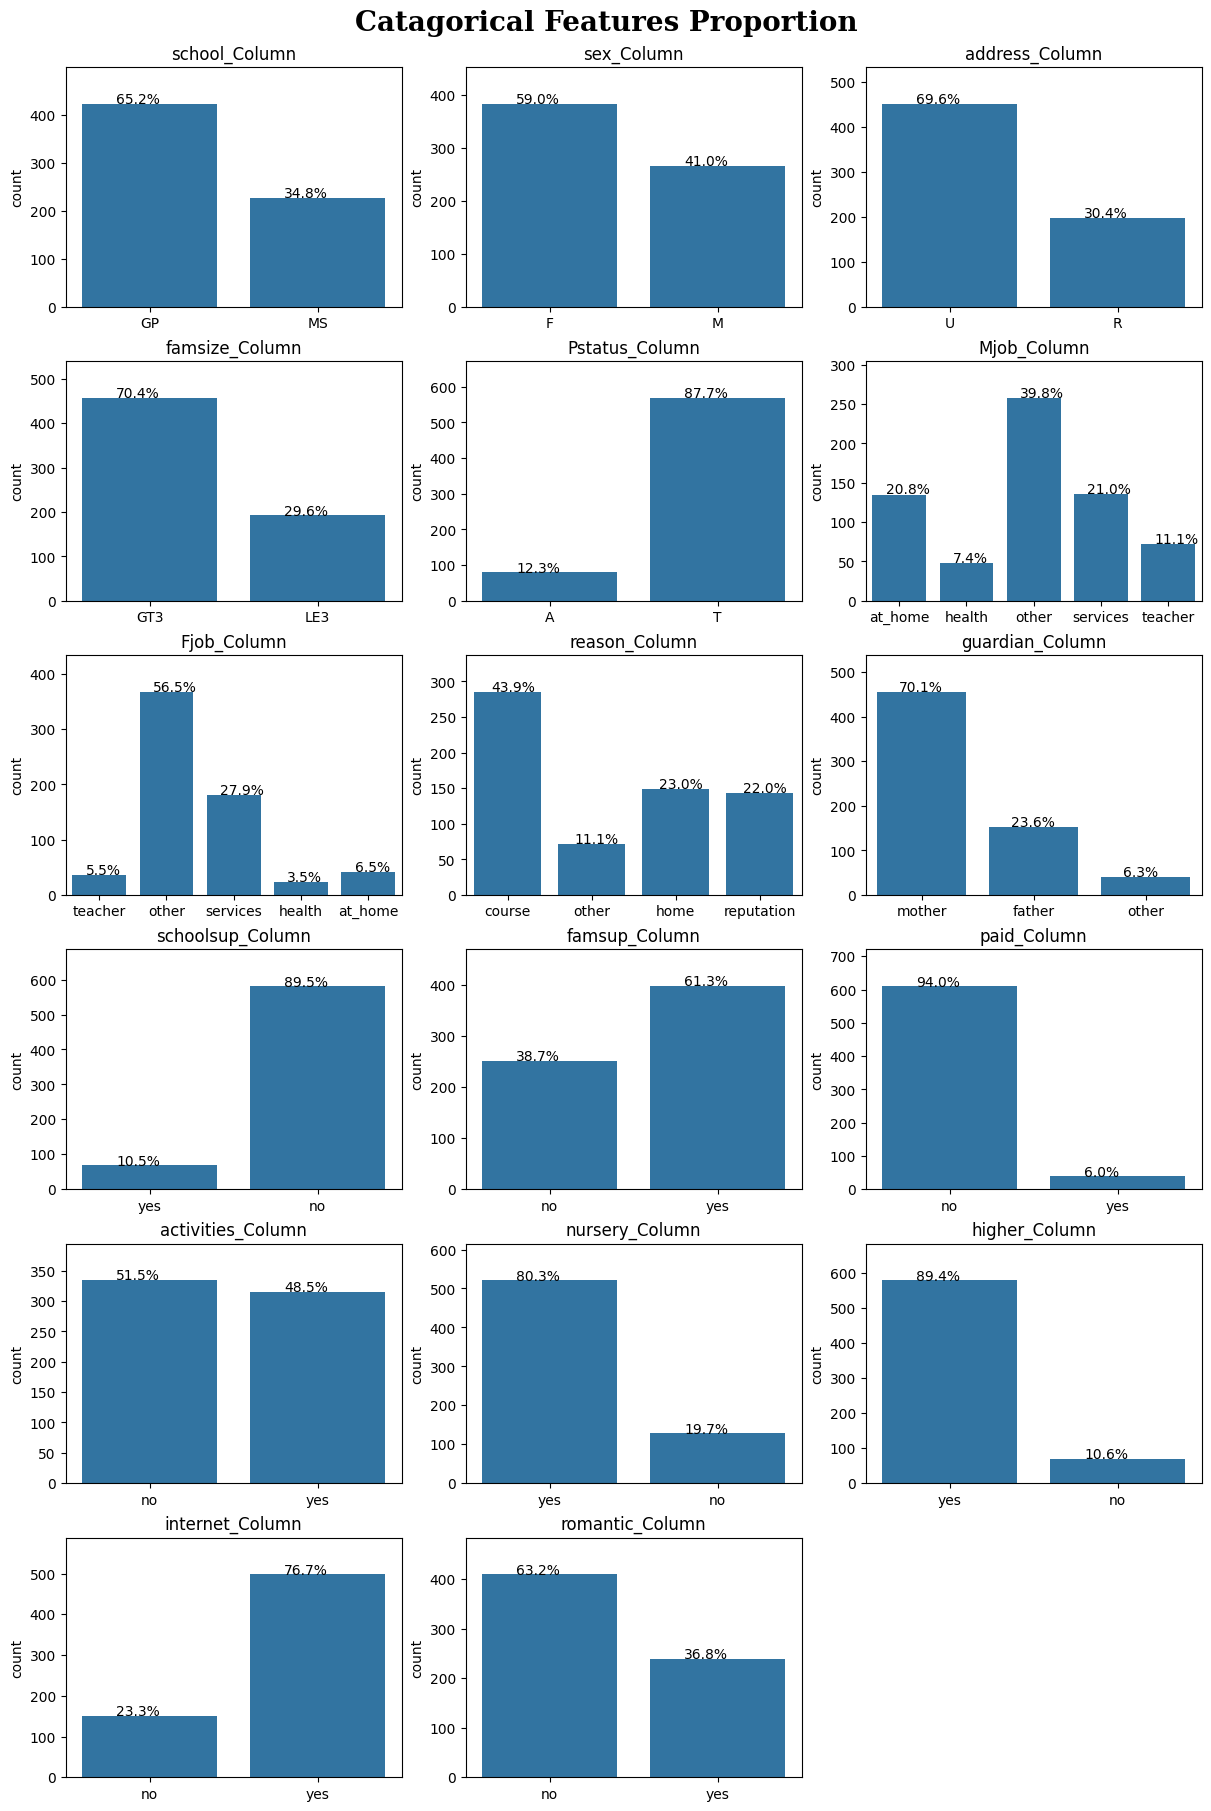

In [13]:
def ncols_calculator(cols,nrows=3):
    n = len(cols)
    ncols = n//nrows
    if ncols*nrows < n:
        ncols+=1
    axdel = ncols*nrows-n
    return ncols,axdel
def bar_matrix(df,cols,nrows=3,annot=True,title='You Forget Your Title!'):
    ncols,axdel = ncols_calculator(cols)
    fig,axes = plt.subplots(ncols,nrows,figsize=(nrows*4,ncols*3),constrained_layout=True)
    plt.suptitle(f'{title}',size=20, fontweight='bold', fontfamily='serif')
    axes=axes.ravel()
    if axdel >0:
        for ax in range(1,axdel+1):
            axes[-ax].remove()
    for i in range(len(cols)):
        ax = axes[i]
        col = cols[i]
        sns.countplot(x=col,data=df,color=sns.color_palette()[0],ax=ax)
        ax.set_xlabel("")
        ax.set_title(col+'_Column')
        ax.set_ylim(0,max(ax.get_ylim())+max(ax.get_ylim())/8)
        if annot==True:
            for p in ax.patches:
                x = p.get_x()+0.2
                y = p.get_height()+1
                percentage = '{:.1f}%'.format(100*p.get_height()/df.shape[0])
                ax.annotate(percentage,(x,y))
bar_matrix(df,cat_columns,annot=True,title='Catagorical Features Proportion')

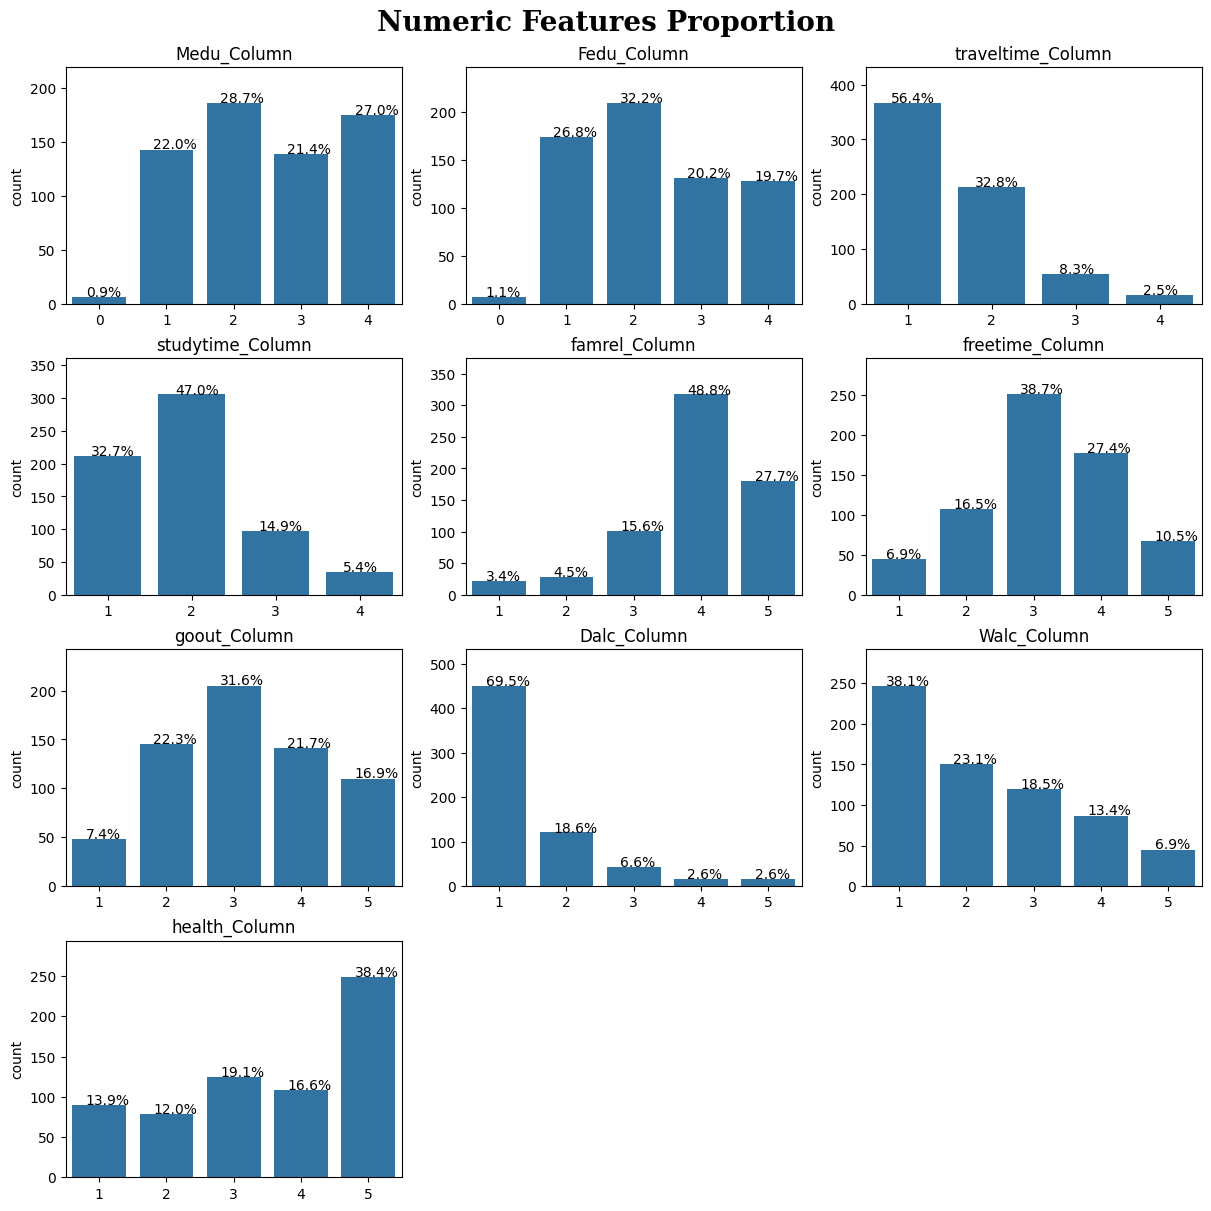

In [14]:
bar_matrix(df,num_columns,annot=True,title='Numeric Features Proportion')

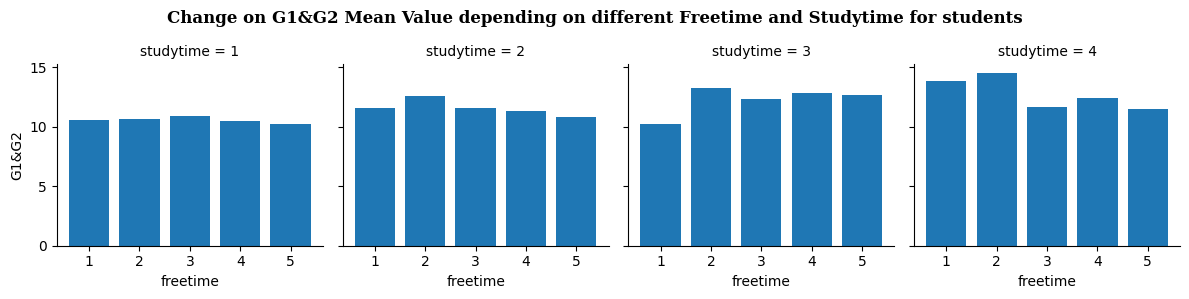

In [15]:
mu_df = df.copy()
mu_df['G1&G2'] = round((mu_df['G1'] + mu_df['G2'])/2,1)
mu_df['MFedu'] = mu_df['Medu'] + mu_df['Fedu']

mu_df.drop(labels=['G1','G2','Medu','Fedu'],inplace=True,axis=1)

#Updating my list of columns after the adjustments
mu_cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
mu_num_columns = ['traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','MFedu']
mu_cont_columns = ['age','failures','absences','G3']

def exam_mean_facetgrid(df, face_column, x_col, mean_col='G1&G2', title='Forgotten!!'):
       # Ensure that the mean_col is of a numeric type
       df[mean_col] = pd.to_numeric(df[mean_col], errors='coerce')

       # Group and calculate mean safely
       plot_data = df.groupby([x_col, face_column])[mean_col].mean().reset_index()

       g = sns.FacetGrid(data=plot_data, col=face_column, margin_titles=True)
       g.map(plt.bar, x_col, mean_col)
       g.fig.subplots_adjust(top=0.8)
       g.fig.suptitle(title, size=12, fontweight='bold', fontfamily='serif')

exam_mean_facetgrid(df=mu_df, face_column='studytime', x_col='freetime', title='Change on G1&G2 Mean Value depending on different Freetime and Studytime for students')

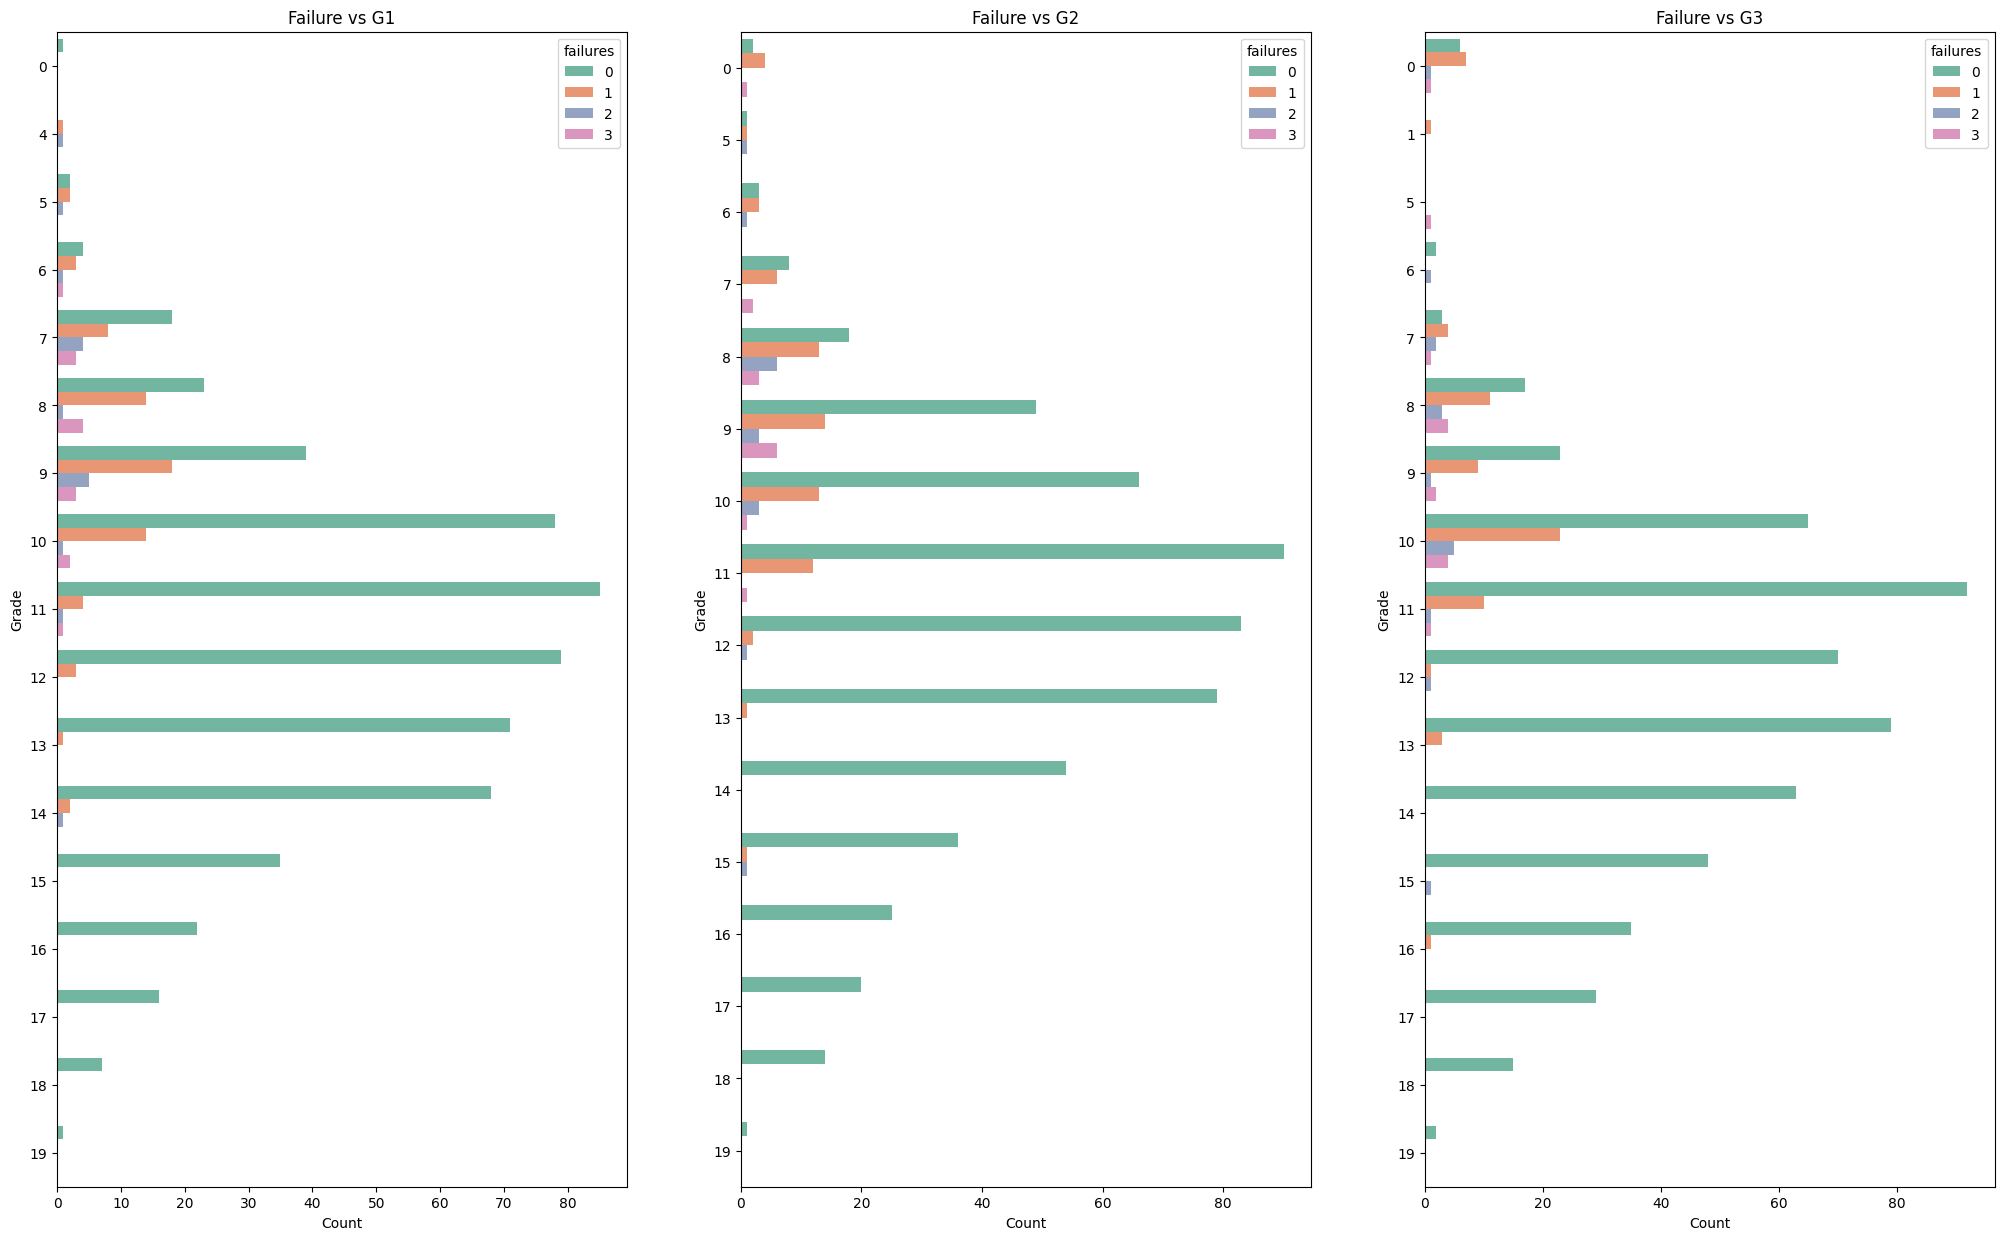

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

for i, grade in enumerate(['G1', 'G2', 'G3']):
    sns.countplot(data=df, y=grade, hue='failures', ax=axes[i], palette='Set2', dodge=True)
    axes[i].set_title(f'Failure vs {grade}')
    axes[i].set_ylabel('Grade')
    axes[i].set_xlabel('Count')

plt.show()



In [ ]:
def find_anomalies_iqr(dataframe):
    anomaly_count = {}
    for column in dataframe.select_dtypes(include=['number']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Найти аномальные значения
        anomalies = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        anomaly_count[column] = len(anomalies)

    return anomaly_count

# Поиск аномалий
anomalies = find_anomalies_iqr(df)

# Вывод количества аномалий по переменным
for column, count in anomalies.items():
    print(f"Переменная '{column}': {count} аномалий")

Переменная 'age': 1 аномалий
Переменная 'Medu': 0 аномалий
Переменная 'Fedu': 0 аномалий
Переменная 'traveltime': 16 аномалий
Переменная 'studytime': 35 аномалий
Переменная 'failures': 100 аномалий
Переменная 'famrel': 51 аномалий
Переменная 'freetime': 45 аномалий
Переменная 'goout': 0 аномалий
Переменная 'Dalc': 34 аномалий
Переменная 'Walc': 0 аномалий
Переменная 'health': 0 аномалий
Переменная 'absences': 21 аномалий
Переменная 'G1': 16 аномалий
Переменная 'G2': 25 аномалий
Переменная 'G3': 16 аномалий


1) Найти датасет на задачу классификации или регрессии с большим количеством точек (много наблюдений и много факторов)


Создадим доп. признаки и сделаем препроцессинг



In [ ]:
categorical_features = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities",
           "nursery", "higher", "internet", "romantic"]
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']

In [ ]:
# Создаем пайплайн для обработки данных
numeric_pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaling', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder( handle_unknown='ignore')),
])

# Объединяем пайплайны в ColumnTransformer
CT = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'  # Оставляем остальные столбцы без изменений
)


display(CT)
ct=CT.fit_transform(X)
pd.DataFrame(ct).head(5)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('poly',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health', 'absences',
                                  'G1', 'G2']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'guardian', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet',
                                  'romantic'])])

,0,1,2,3,4,5,6,7,8,9,...,848,849,850,851,852,853,854,855,856,857
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
ct.shape

(649, 858)

 2) Разделить данные на трейн, несколько уровней валидации (сильно больших, чем тест) и тест.

In [ ]:
# Разделение данных на Training Set и остальные части
X_train_val, X_test, y_train_val, y_test = train_test_split(ct, y, test_size=0.15, random_state=42)

# Разделение оставшейся части на три валидационные части
X_train, X_val1, y_train, y_val1 = train_test_split(X_train_val, y_train_val, test_size=1/4, random_state=42)
X_val2, X_val3, y_val2, y_val3 = train_test_split(X_train_val, y_train_val, test_size=1/2, random_state=42)

print("Размеры выборок:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val1: {X_val1.shape}, y_val1: {y_val1.shape}")
print(f"X_val2: {X_val2.shape}, y_val2: {y_val2.shape}")
print(f"X_val3: {X_val3.shape}, y_val3: {y_val3.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Размеры выборок:
X_train: (413, 858), y_train: (413,)
X_val1: (138, 858), y_val1: (138,)
X_val2: (275, 858), y_val2: (275,)
X_val3: (276, 858), y_val3: (276,)
X_test: (98, 858), y_test: (98,)


 3) Обучить большое количество различных базовых алгоритмов различной сложности на трейне, далее найти оптимальные веса для блендинга алгоритмов с помощью метаэвристического алгоритма (выбрать любой, но описать принцип его действия). Проверить обученные веса на тесте.

In [ ]:
# # Список моделей
models = [
    LinearRegression(),
    Ridge(alpha=10),
    Lasso(alpha=0.1, max_iter=10000),
    DecisionTreeRegressor(max_depth=3, min_samples_split=3),
    RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_split=3, n_jobs=-1, random_state=42),
    GradientBoostingRegressor(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42),
    CatBoostRegressor(loss_function='RMSE', verbose=0),
    XGBRegressor(learning_rate=0.1, max_depth=7, subsample=0.8, colsample_bytree=0.8),
    SVR(kernel='linear'),
    # SVR(kernel='rbf'),
    KNeighborsRegressor(n_neighbors=5),
    ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000),
    LassoLars(alpha=0.1),
    BaggingRegressor(n_estimators=100, random_state=42),
    BayesianRidge(),
    RidgeCV(),
    LassoCV(max_iter=10000),
    MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    GaussianProcessRegressor(kernel =RBF(length_scale=1.0) , n_restarts_optimizer=5, random_state=42),
    # LGBMRegressor(force_col_wise=True, max_depth=-1, num_leaves=64, min_child_samples=1, min_split_gain=0.0, subsample=0.8,colsample_bytree=0.8),
    HuberRegressor(max_iter=1000, epsilon=1.0),
    HistGradientBoostingRegressor(),
    ExtraTreesRegressor(),
    PLSRegression()
]

In [ ]:
def train_regression_models(X, y, models):
    # Разделение данных на обучающую и тестовую выборки
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Разделение оставшейся части на три валидационные части
    X_train, X_val1, y_train, y_val1 = train_test_split(X_train_val, y_train_val, test_size=1/4, random_state=42)
    X_val2, X_val3, y_val2, y_val3 = train_test_split(X_train_val, y_train_val, test_size=1/2, random_state=42)

    results = {}
    predictions = {}
    val_results = {}

    # Обучение каждой модели и оценка ее качества
    for model in models:
        model_name = type(model).__name__

        # Обучение модели
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        test_predictions = model.predict(X_test)
        test_mae = mean_absolute_error(test_predictions, y_test)

        # Предсказания на валидационных наборах
        val1_predictions = model.predict(X_val1)
        val1_mae = mean_absolute_error(val1_predictions, y_val1)

        val2_predictions = model.predict(X_val2)
        val2_mae = mean_absolute_error(val2_predictions, y_val2)

        val3_predictions = model.predict(X_val3)
        val3_mae = mean_absolute_error(val3_predictions, y_val3)

        # Сохранение результатов
        results[model_name] = test_mae
        predictions[model_name] = test_predictions

        # Сохранение результатов для валидационных наборов
        val_results[model_name] = {
            'val1_mae': val1_mae,
            'val2_mae': val2_mae,
            'val3_mae': val3_mae
        }

    return results, predictions, val_results

# Пример вызова функции
results, predictions, val_results = train_regression_models(ct, y, models)
print("Test Results:", results)
print("Validation Results:", val_results)
print(len(predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test Results: {'LinearRegression': 2.1954798828942312, 'Ridge': 0.9664368596419035, 'Lasso': 0.6807898932829033, 'DecisionTreeRegressor': 0.8725969019792619, 'RandomForestRegressor': 0.7568456960534684, 'GradientBoostingRegressor': 0.7804898720072789, 'AdaBoostRegressor': 0.8172849725807841, 'CatBoostRegressor': 0.7930853994862129, 'XGBRegressor': 0.7662862174364985, 'SVR': 1.1202493188753098, 'KNeighborsRegressor': 1.2938775510204081, 'ElasticNet': 0.6951572816304071, 'LassoLars': 0.6806184576014099, 'BaggingRegressor': 0.76, 'BayesianRidge': 0.8611960787971011, 'RidgeCV': 0.9664368596418522, 'LassoCV': 0.6688551469899364, 'MLPRegressor': 1.142385165851307, 'GaussianProcessRegressor': 1.9280006013108342, 'HuberRegressor': 0.958963277373388, 'HistGradientBoostingRegressor': 0.8019737427906711, 'ExtraTreesRegressor': 0.7433673469387753, 'PLSRegression': 1.0029729893613528}
Validation Results: {'LinearRegression': {'val1_mae': 2.3821388956320098, 'val2_mae': 2.021171109266685e-14, 'val3_

**Генетический метаэвристический алгоритм**

способ 1.1

In [ ]:
# Функция для вычисления ошибки ансамбля
def ensemble_error(weights, models, X, y_true):
    predictions = np.zeros_like(y_true, dtype=float)
    for weight, model in zip(weights, models):
        predictions += weight * model.predict(X)
    return mean_absolute_error(y_true, predictions)

# Генетический алгоритм
def genetic_algorithm(models, X, y, population_size=50, generations=100, mutation_rate=0.1):
    # Инициализация популяции
    population = np.random.uniform(-1, 1, (population_size, len(models)))

    for generation in range(generations):
        # Оценка популяции
        fitness = np.array([ensemble_error(individual, models, X, y) for individual in population])

        # Инвертирование фитнеса для создания вероятностей
        fitness_inv = 1 / (fitness + 1e-6)  # Добавление маленького числа для избежания деления на ноль
        fitness_inv /= fitness_inv.sum()  # Нормализация

        # Выбор родителей (турнирный отбор)
        selected_indices = np.random.choice(np.arange(population_size), size=population_size, replace=True, p=fitness_inv)
        selected_population = population[selected_indices]

        # Кроссовер
        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            crossover_point = np.random.randint(1, len(models))
            child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            offspring.extend([child1, child2])

        # Мутация
        for individual in offspring:
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(len(models))
                individual[mutation_index] = np.random.uniform(-1, 1)  # Перезаписываем мутацию

        # Обновление популяции
        population = np.array(offspring)

    # Выбор лучшего решения
    best_index = np.argmin([ensemble_error(individual, models, X, y) for individual in population])
    best_weights = population[best_index]
    return best_weights

# Пример использования
models = models
best_weights = genetic_algorithm(models, X_train, y_train)
print("Лучшие веса:", best_weights)


Лучшие веса: [ 0.45385596 -0.99661683 -0.24618046 -0.37814895 -0.28830283  0.80481317
 -0.32949931 -0.70254791  0.51714758 -0.7977946   0.25434342 -0.10893385
  0.35568342 -0.53994158  0.55845338 -0.163023    0.6324947   0.0590943
  0.87513894  0.28496567  0.01962793  0.90462023 -0.16478739]


способ 1.2

In [ ]:
# Функция для вычисления ошибки ансамбля
def ensemble_error(weights, models, X, y_true):
    predictions = np.zeros_like(y_true, dtype=float)
    for weight, model in zip(weights, models):
        predictions += weight * model.predict(X)
    return mean_absolute_error(y_true, predictions)

# Генетический алгоритм
def genetic_algorithm_1(models, X, y, population_size=50, generations=100, mutation_rate=0.1):
    # Инициализация популяции
    population = np.random.rand(population_size, len(models))

    for generation in range(generations):
        # Оценка популяции
        fitness = np.array([ensemble_error(individual, models, X, y) for individual in population])

        # Инвертирование фитнеса для создания вероятностей
        fitness_inv = 1 / (fitness + 1e-6)  # Добавление маленького числа для избежания деления на ноль
        fitness_inv /= fitness_inv.sum()  # Нормализация

        # Выбор родителей (турнирный отбор)
        selected_indices = np.random.choice(np.arange(population_size), size=population_size, replace=True, p=fitness_inv)
        selected_population = population[selected_indices]

        # Кроссовер
        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            crossover_point = np.random.randint(1, len(models))
            child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            offspring.extend([child1, child2])

        # Мутация
        for individual in offspring:
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(len(models))
                individual[mutation_index] = np.random.rand()  # Перезаписываем мутацию
                individual = np.clip(individual, 0, 1)

        # Обновление популяции
        population = np.array(offspring)

    # Выбор лучшего решения
    best_index = np.argmin([ensemble_error(individual, models, X, y) for individual in population])
    best_weights_1 = population[best_index]
    normalized_weights = [w / sum(best_weights_1) for w in best_weights_1]
    return normalized_weights

# Пример использования
models = models
best_weights_1 = genetic_algorithm_1(models, X_train, y_train)
print("Лучшие веса:", best_weights_1)

Лучшие веса: [0.03984263330944708, 0.09616175279350885, 0.010918234381961048, 0.06301461117717784, 0.014410880077761874, 0.10041980962709217, 0.15584853850957603, 0.04554483480970413, 0.013096795831419983, 0.03169934498732659, 0.00010457138446404938, 0.020134519706758777, 0.027656239340548616, 0.007442735019946557, 0.03916461419926733, 0.09989807596788763, 0.002305308200439086, 0.009196075204573172, 0.06845848581975043, 0.009130308890963348, 0.044141247084166856, 0.01861611568469884, 0.08279426799155976]


In [ ]:
assert len(best_weights) == len(models), "Количество весов должно совпадать с количеством моделей."

first_model_name = type(models[0]).__name__
blended_pred_4 = np.zeros_like(predictions[first_model_name])

for i, model in enumerate(models):
    model_name = type(model).__name__
    blended_pred_4 += best_weights[i] * predictions[model_name]

# print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(blended_pred_4, y_test))
print("Mean Absolute Error:", mean_absolute_error(blended_pred_4, y_test))
print("Mean Squared Error:", mean_squared_error(blended_pred_4, y_test))

Mean Absolute Error: 1.9783510410844236
Mean Squared Error: 7.828891395563887


In [ ]:
assert len(best_weights_1) == len(models), "Количество весов должно совпадать с количеством моделей."

first_model_name = type(models[0]).__name__
blended_pred_5 = np.zeros_like(predictions[first_model_name])

for i, model in enumerate(models):
    model_name = type(model).__name__
    blended_pred_5 += best_weights_1[i] * predictions[model_name]

# print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(blended_pred_5, y_test))
print("Mean Absolute Error:", mean_absolute_error(blended_pred_5, y_test))
print("Mean Squared Error:", mean_squared_error(blended_pred_5, y_test))

Mean Absolute Error: 0.7794570109904249
Mean Squared Error: 1.739126568336929
